In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import power_transform, MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


def get_file_using_PublicURL(public_url):
  file_id_url = public_url.split('/')[-2]
  return 'https://drive.google.com/uc?id=' + file_id_url

# dataset = pd.read_csv( get_file_using_PublicURL(''))
try :
    dataset = pd.read_csv('loan_data_2007_2014.csv', index_col=0)
except:
    dataset = pd.read_csv('D:\Projects\Datasets\IDX\loan_data_2007_2014.csv', index_col=0)


C:\Users\nanda\AppData\Local\Temp\ipykernel_13900\3080139015.py:25: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('D:\Projects\Datasets\IDX\loan_data_2007_2014.csv', index_col=0)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [4]:
dataset.duplicated().sum()

0

In [5]:
used_columns = ['annual_inc','collection_recovery_fee','collections_12_mths_ex_med','delinq_2yrs','dti','earliest_cr_line','emp_length',
                'funded_amnt','grade','home_ownership','initial_list_status','installment','int_rate','issue_d','inq_last_6mths','last_pymnt_d',
                'last_pymnt_amnt','last_credit_pull_d','loan_amnt','loan_status','mths_since_last_delinq','open_acc','out_prncp','out_prncp_inv',
                'pub_rec','purpose','recoveries','revol_bal','revol_util','sub_grade','term','total_acc','total_pymnt','total_pymnt_inv',
                'total_rec_int','total_rec_late_fee','total_rec_prncp']

df = dataset[used_columns].copy()
df.columns

Index(['annual_inc', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'funded_amnt',
       'grade', 'home_ownership', 'initial_list_status', 'installment',
       'int_rate', 'issue_d', 'inq_last_6mths', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'loan_amnt', 'loan_status',
       'mths_since_last_delinq', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'pub_rec', 'purpose', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp'],
      dtype='object')

In [6]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### **Show Cardinality**

In [7]:
df = df[ df.loan_status.isin(['Fully Paid','Charged Off']) ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227214 entries, 0 to 466283
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  227214 non-null  float64
 1   collection_recovery_fee     227214 non-null  float64
 2   collections_12_mths_ex_med  227158 non-null  float64
 3   delinq_2yrs                 227214 non-null  float64
 4   dti                         227214 non-null  float64
 5   earliest_cr_line            227214 non-null  object 
 6   emp_length                  218541 non-null  object 
 7   funded_amnt                 227214 non-null  int64  
 8   grade                       227214 non-null  object 
 9   home_ownership              227214 non-null  object 
 10  initial_list_status         227214 non-null  object 
 11  installment                 227214 non-null  float64
 12  int_rate                    227214 non-null  float64
 13  issue_d       

<AxesSubplot:>

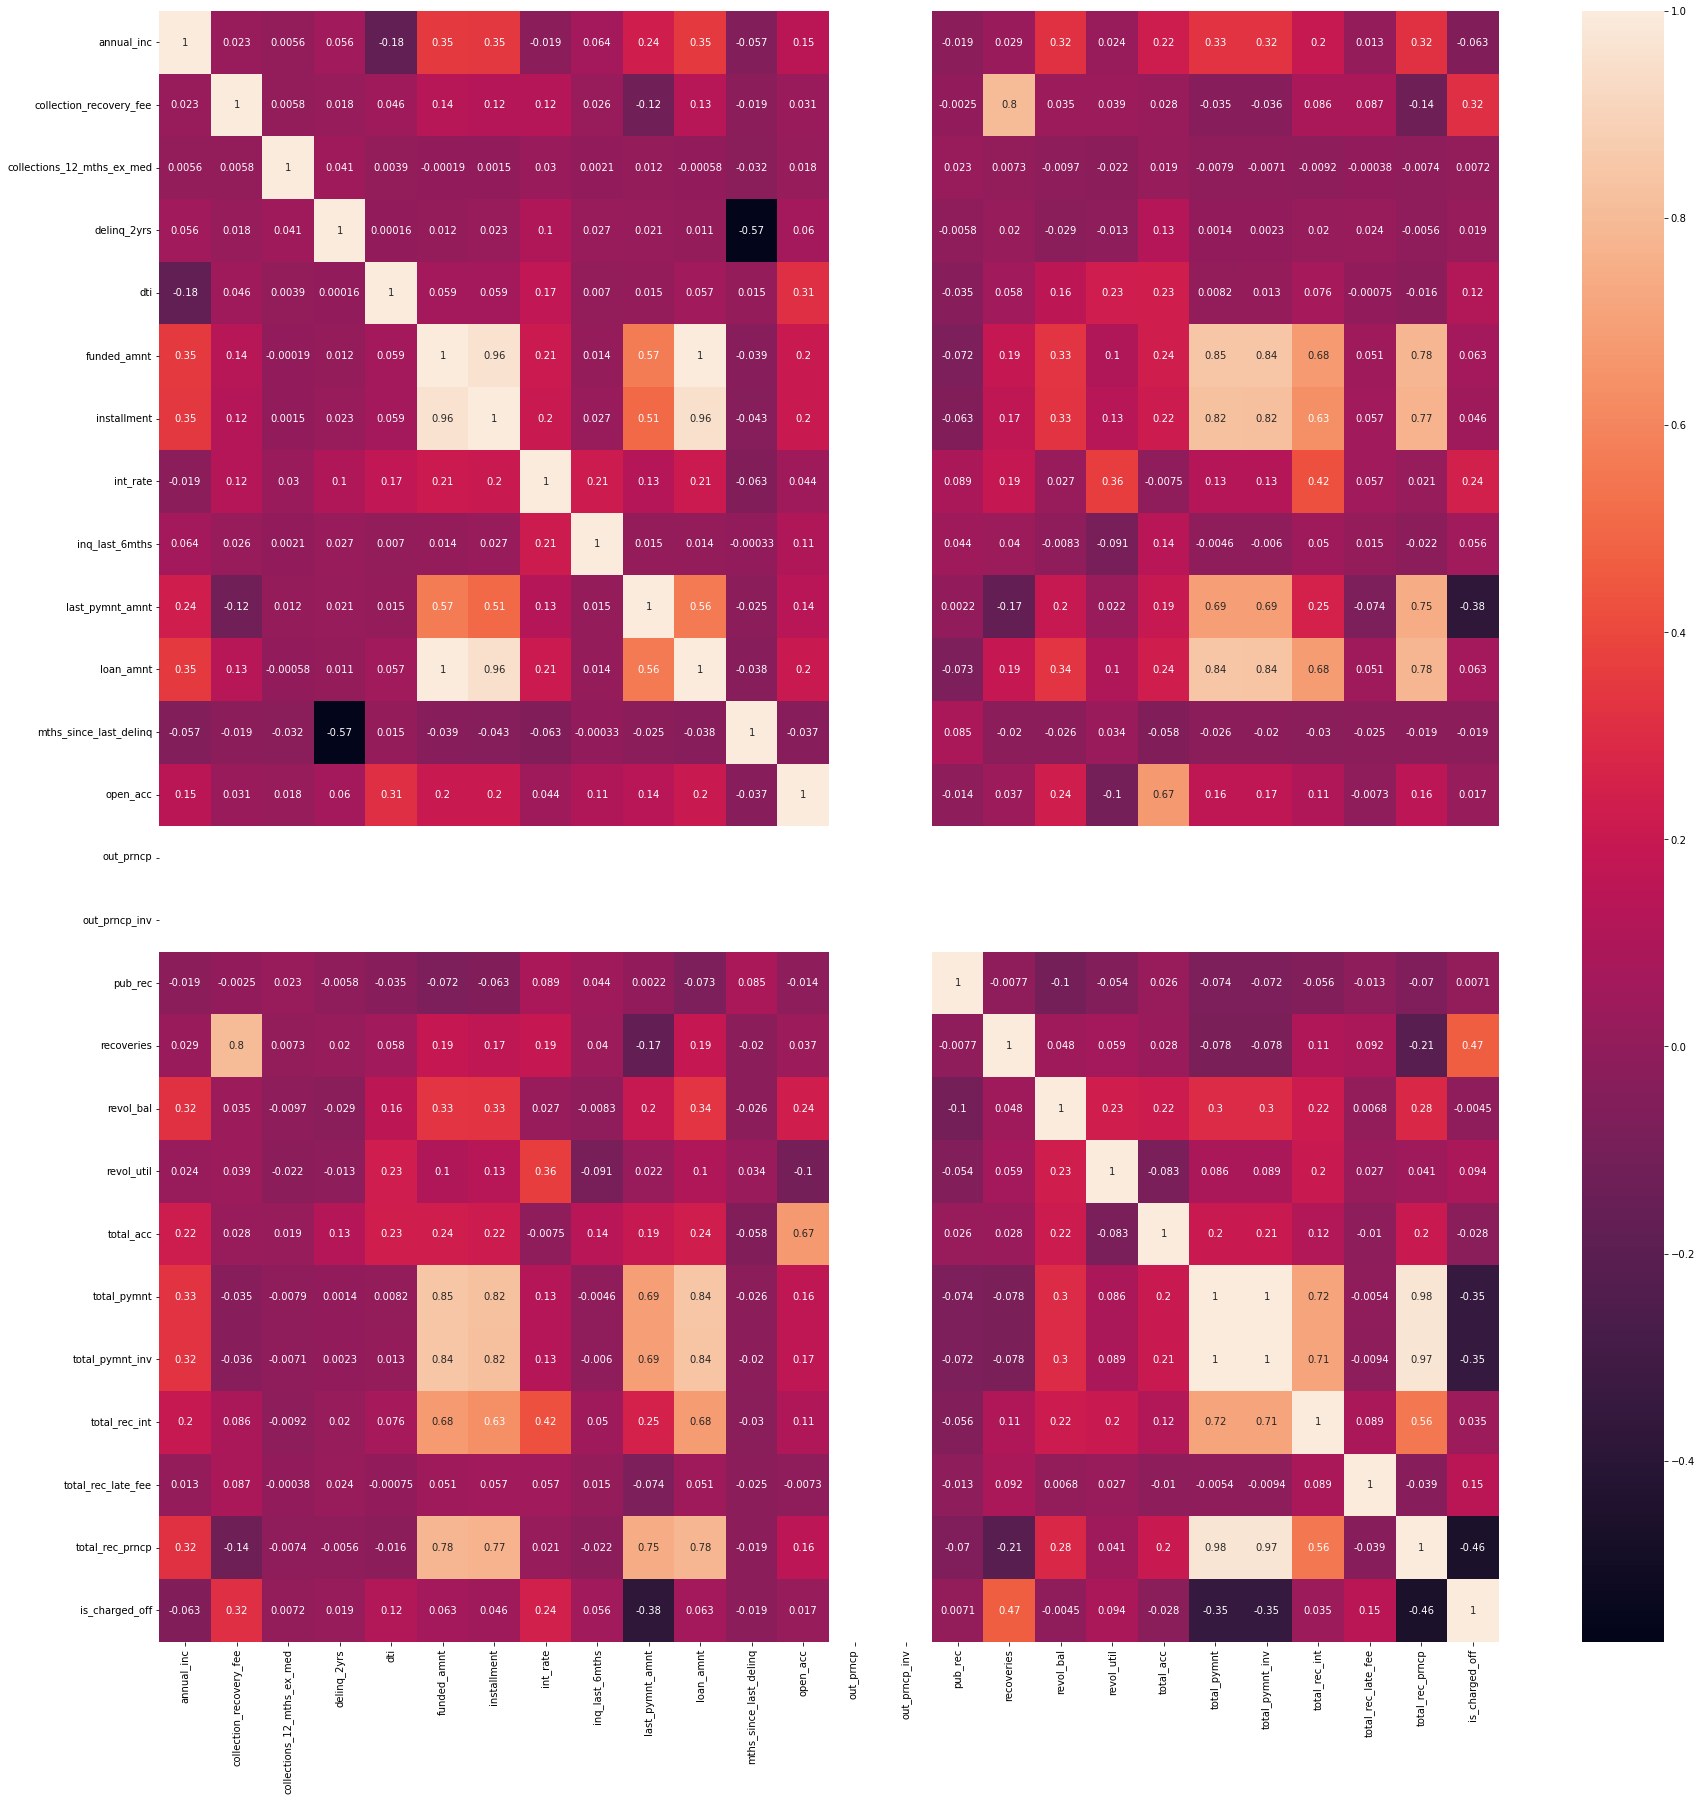

In [8]:
df['is_charged_off'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True)

In [9]:
df.dropna(subset=['last_pymnt_d','last_credit_pull_d'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226829 entries, 0 to 466283
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  226829 non-null  float64
 1   collection_recovery_fee     226829 non-null  float64
 2   collections_12_mths_ex_med  226773 non-null  float64
 3   delinq_2yrs                 226829 non-null  float64
 4   dti                         226829 non-null  float64
 5   earliest_cr_line            226829 non-null  object 
 6   emp_length                  218179 non-null  object 
 7   funded_amnt                 226829 non-null  int64  
 8   grade                       226829 non-null  object 
 9   home_ownership              226829 non-null  object 
 10  initial_list_status         226829 non-null  object 
 11  installment                 226829 non-null  float64
 12  int_rate                    226829 non-null  float64
 13  issue_d       

### Data Pre-Processing

In [10]:
from datetime import datetime
from dateutil import relativedelta

def counts_month(start_date, end_date = 'Dec-2014'):
    if ( int(start_date[-2:]) <= 14 ):
        from_d = start_date[:-2]+'20'+start_date[-2:]
    else:
        from_d = start_date[:-2]+'19'+start_date[-2:]
    delta = relativedelta.relativedelta( datetime.strptime(end_date, "%b-%Y"), datetime.strptime(from_d, "%b-%Y") )
    return delta.years*12 + delta.months

columns_d = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']
# df['status'] = np.where( df.loan_status == 'Charged Off', 1, 0)
temp = df.copy()
for i in columns_d:
    df[i] = df[i].apply(lambda x: counts_month(x))

df.fillna({'mths_since_last_delinq':999}, inplace=True)

df.loc[ df.home_ownership.isin(['NONE','ANY']), 'home_ownership' ] = 'OTHER'
df = pd.get_dummies(df, columns=['home_ownership','purpose'], drop_first=True)

employment_ = {'< 1 year':0 , '1 year':1 , '2 years':2 , '3 years':3 , '4 years':4, '5 years':5,
                     '6 years':6 , '7 years':7 , '8 years':8 , '9 years':9 , '10+ years':10}
grade_ = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
term_ = {' 36 months': 36, ' 60 months': 60}
subgrade_ = {'A1':1,'A2':2,'A3':3,'A4':4,'A5':5, 'B1':6,'B2':7,'B3':8,'B4':9,'B5':10,
            'C1':11,'C2':12,'C3':13,'C4':14,'C5':15, 'D1':16,'D2':17,'D3':18,'D4':19,'D5':20,
            'E1':21,'E2':22,'E3':23,'E4':24,'E5':25, 'F1':26,'F2':27,'F3':28,'F4':29,'F5':30,
            'G1':31,'G2':32,'G3':33,'G4':34,'G5':35}

df['emp_length'] = df['emp_length'].map(employment_)
df['grade'] = df['grade'].map(grade_)
df['term'] = df['term'].map(term_)
df['sub_grade'] = df['sub_grade'].map(subgrade_)
df['initial_list_status'] = df['initial_list_status'].map({'f':0, 'w':1})

df.drop(columns=['out_prncp','out_prncp_inv', 'loan_status'], inplace=True)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217951 entries, 0 to 466283
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  217951 non-null  float64
 1   collection_recovery_fee     217951 non-null  float64
 2   collections_12_mths_ex_med  217951 non-null  float64
 3   delinq_2yrs                 217951 non-null  float64
 4   dti                         217951 non-null  float64
 5   earliest_cr_line            217951 non-null  int64  
 6   emp_length                  217951 non-null  float64
 7   funded_amnt                 217951 non-null  int64  
 8   grade                       217951 non-null  int64  
 9   initial_list_status         217951 non-null  int64  
 10  installment                 217951 non-null  float64
 11  int_rate                    217951 non-null  float64
 12  issue_d                     217951 non-null  int64  
 13  inq_last_6mths

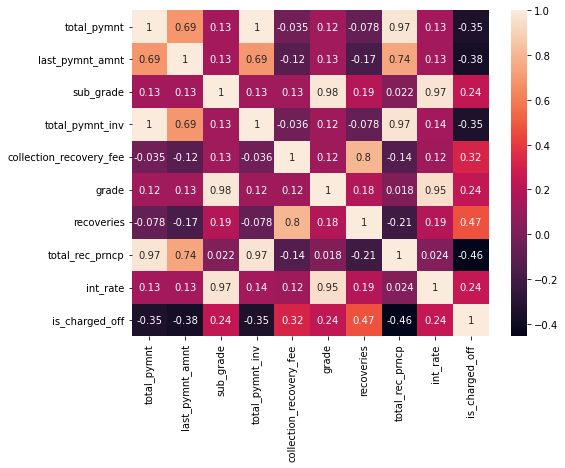

In [11]:
proposed_features = ['total_pymnt','last_pymnt_amnt','sub_grade','total_pymnt_inv','collection_recovery_fee','grade','recoveries','total_rec_prncp','int_rate','is_charged_off']
df_clean = df[proposed_features].copy()
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True)
plt.show()

In [12]:
def kdeplot_me(df, columns, hue=None, figsize=(30, 15)):
    plt.figure(figsize=figsize)
    for col_name, index in zip(columns, range(len(columns))):
        plt.subplot( int(len(columns)/6)+1  , 6, index+1)
        if hue != None:
            sns.kdeplot(data=df, x=col_name, hue=hue, color='green', linewidth=3, fill=True)
        else:
            sns.kdeplot(data=df, x=col_name, color='green', linewidth=3, fill=True)
        plt.xlabel(col_name)
    plt.show()

def boxplot_me(df, columns, x, figsize=(30, 15)):
    plt.figure(figsize=figsize)
    for col_name, index in zip(columns, range(len(columns))):
        plt.subplot( int(len(columns)/6)+1  , 6, index+1)
        sns.boxplot(data=df, x=x, y=col_name)
        plt.xlabel(col_name)
    plt.show()
       
def log_transform(temp_df, log_columns):
    for col in log_columns:
        if temp_df[col].min() == 0:
            # df[col] = np.log(df[col]+1)
            temp_df[col], fitted_lambda = stats.boxcox( ( temp_df[col] + 1) )
        elif df[col].min() > 0:
            # df[col] = np.log(df[col])
            temp_df[col], fitted_lambda = stats.boxcox( temp_df[col] )

def get_minmax_scaler(temp_df, columns):
    scaler = {}
    for col in columns:
        scaler[col] = MinMaxScaler().fit( np.array(temp_df[col]).reshape(-1,1) )
    return scaler

def get_standard_scaler(temp_df, columns):
    scaler = {}
    for col in columns:
        scaler[col] = StandardScaler().fit( np.array(temp_df[col]).reshape(-1,1) )
    return scaler

def apply_transform(scaler, temp_df):
    tmp_df = temp_df.copy()
    for col in scaler.keys():
        tmp_df[col] = scaler[col].transform( np.array(temp_df[col]).reshape(-1,1) )
    return tmp_df
# plot_me(df, kolom, figsize=(30, 20))
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217951 entries, 0 to 466283
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   total_pymnt              217951 non-null  float64
 1   last_pymnt_amnt          217951 non-null  float64
 2   sub_grade                217951 non-null  int64  
 3   total_pymnt_inv          217951 non-null  float64
 4   collection_recovery_fee  217951 non-null  float64
 5   grade                    217951 non-null  int64  
 6   recoveries               217951 non-null  float64
 7   total_rec_prncp          217951 non-null  float64
 8   int_rate                 217951 non-null  float64
 9   is_charged_off           217951 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 18.3 MB


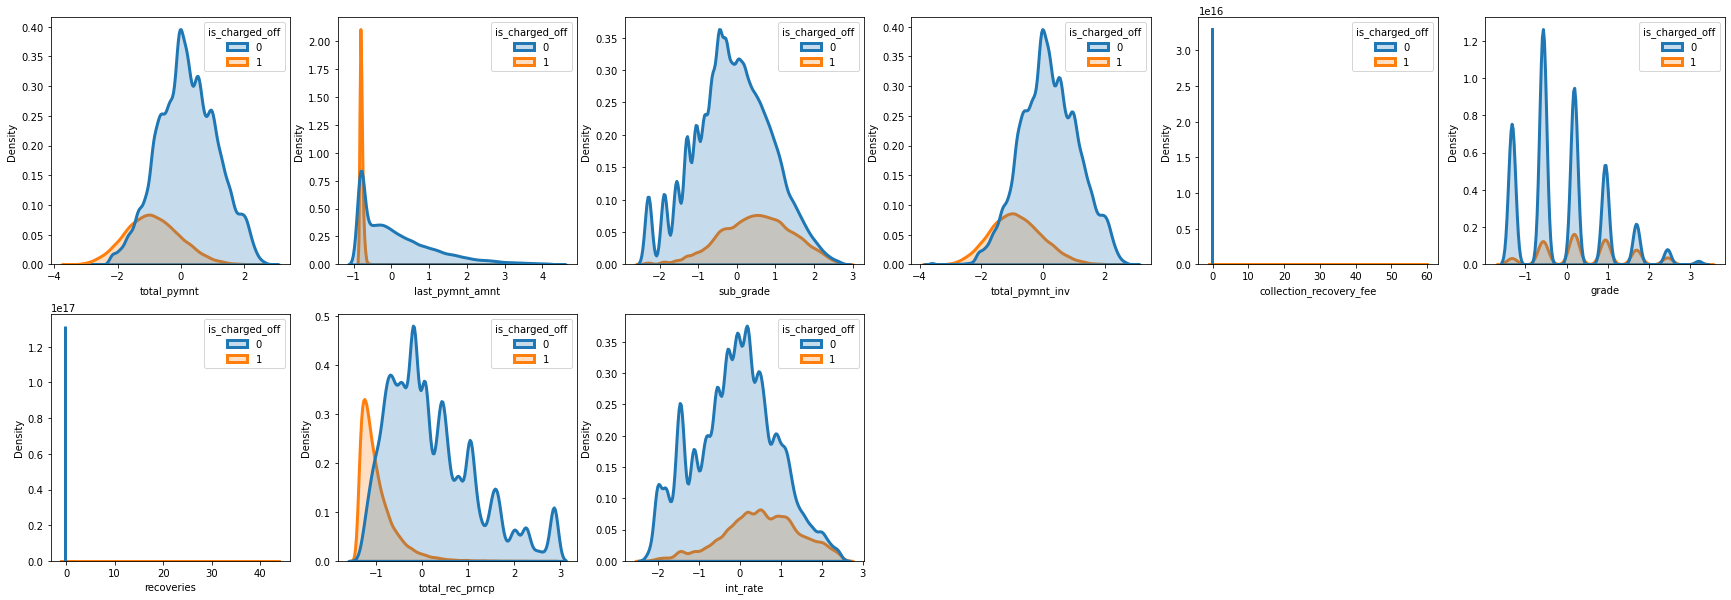

In [13]:
lognormal_columns = ['annual_inc','dti', 'earliest_cr_line', 'funded_amnt', 'installment','int_rate','issue_d', 'loan_amnt',
                     'open_acc','sub_grade','total_acc','total_pymnt','total_pymnt_inv','total_rec_int']
log_normal = list(set(lognormal_columns).intersection(set(df_clean.columns)))
log_transform(df_clean, log_normal)
var_columns = [col for col in df_clean.columns if col not in ['is_charged_off']]
scaler = get_standard_scaler(df_clean, var_columns)
df_clean = apply_transform(scaler, df_clean)
# sns.kdeplot(data=temp['annual_inc_log'])
kdeplot_me(df_clean, var_columns, hue='is_charged_off', figsize=(30, 10))

C:\SYS\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


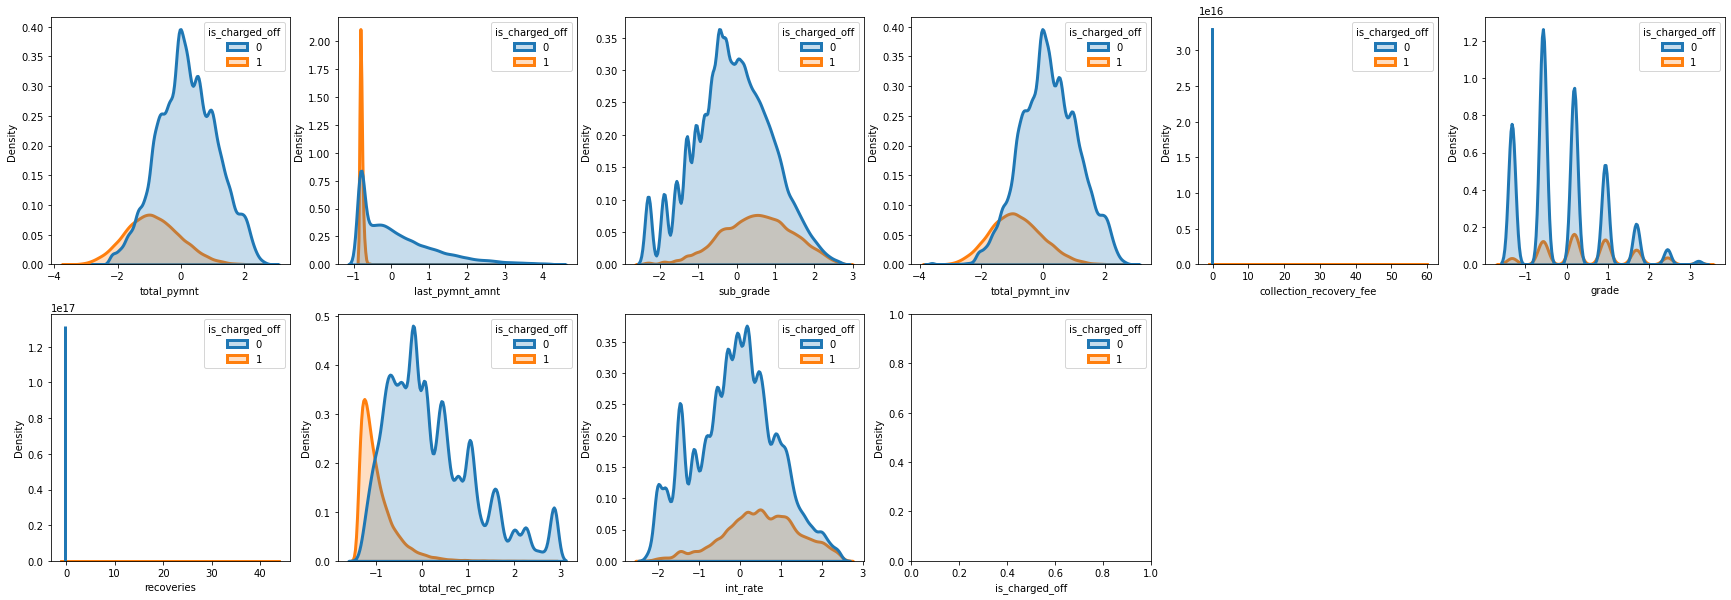

In [14]:
kdeplot_me(df_clean, proposed_features, hue='is_charged_off', figsize=(30, 10))

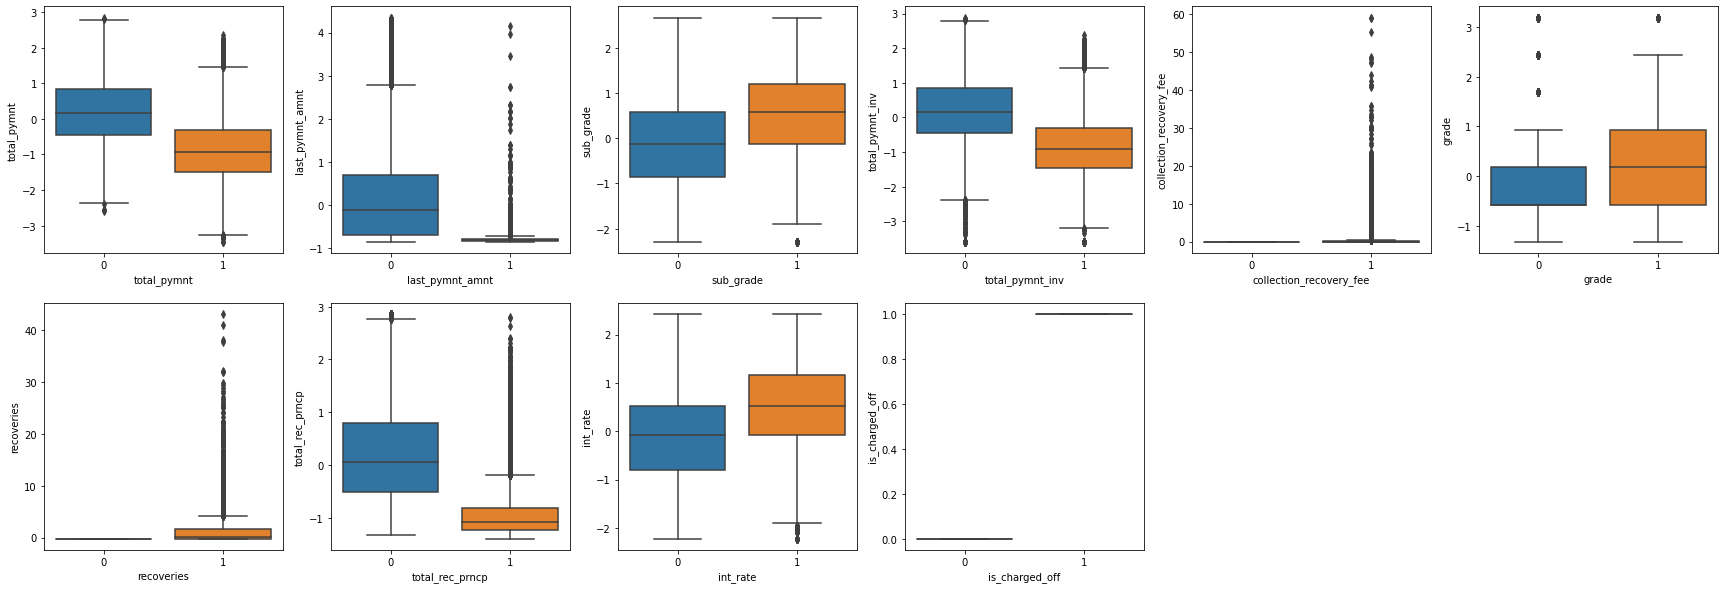

In [15]:
boxplot_me(df_clean, proposed_features, x='is_charged_off', figsize=(30, 10))

In [16]:
df.groupby(['is_charged_off'])[['recoveries']].describe()
# df.groupby(['status'])['total_rec_prncp'].describe()

recoveries                                             \
                    count        mean          std  min  25%     50%   
is_charged_off                                                         
0                178189.0    0.000000     0.000000  0.0  0.0    0.00   
1                 39762.0  945.504207  1596.575452  0.0  0.0  176.92   

                                     
                      75%       max  
is_charged_off                       
0                  0.0000      0.00  
1               1379.8075  33520.27

### **Split Data**

In [17]:
var_columns = [col for col in df_clean.columns if col != 'is_charged_off']
x, y = df_clean[var_columns].copy(), df_clean.is_charged_off.copy()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
ytrain.value_counts()

0    142613
1     31747
Name: is_charged_off, dtype: int64

In [18]:
len(xtrain), len(xtest)

(174360, 43591)

### **Imbalance Treatment**

In [19]:
xtrain_balance, ytrain_balance = xtrain.copy(), ytrain.copy()
# X_train_balance, y_train_balance  = over_sampling.SMOTE(sampling_strategy=1.0).fit_resample(X_train_balance, y_train_balance)
xtrain_balance, ytrain_balance  = over_sampling.SMOTE().fit_resample(xtrain_balance, ytrain_balance)
ytrain_balance.value_counts()

0    142613
1    142613
Name: is_charged_off, dtype: int64

# **Modeling**

In [20]:
def eval_classification(model, xtrain, ytrain, xtest, ytest, threshold=0.5):
    ypred_proba_test = model.predict_proba(xtest)
    ypred_proba_train = model.predict_proba(xtrain)
    ypred_datatest = np.where(ypred_proba_test[:,1]>=threshold, 1, 0 )
    ypred_datatrain = np.where(ypred_proba_train[:,1]>=threshold, 1, 0 )
    cm = confusion_matrix(ytest, ypred_datatest)
    tn, fp, fn, tp = cm.ravel()
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred_datatest))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred_datatest))
    # print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_datatrain))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred_datatest))
    # print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_datatrain))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred_datatest))
    # print("F1-Score (Train Set): %.2f" % f1_score(ytrain, ypred))
    print("AUC (test-proba): %.2f" % roc_auc_score(ytest, ypred_proba_test[:,1] ))
    print("AUC (train-proba): %.2f" % roc_auc_score(ytrain, ypred_proba_train[:,1] ))
    print('tp : {}\nfp  : {}\nfn  : {}\ntn  : {}\n'.format(tp, fp, fn, tn))

### **KNN**

In [21]:
knn = KNeighborsClassifier()
temp_knn = knn.fit(xtrain, ytrain.values.ravel())
eval_classification(knn, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.96
Recall (Test Set): 0.91
F1-Score (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 1.00
tp : 7332
fp  : 306
fn  : 683
tn  : 35270



In [22]:
knn2 = KNeighborsClassifier()
temp_knn = knn2.fit(xtrain_balance, ytrain_balance.values.ravel())
eval_classification(knn2, xtrain_balance, ytrain_balance, xtest, ytest)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.91
Recall (Test Set): 0.96
F1-Score (Test Set): 0.93
AUC (test-proba): 0.99
AUC (train-proba): 1.00
tp : 7699
fp  : 773
fn  : 316
tn  : 34803



### **Random Forest**

In [23]:
rf = RandomForestClassifier(random_state=42)
temp_rf = rf.fit(xtrain, ytrain.values.ravel())
eval_classification(rf, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.99
Precision (Test Set): 0.99
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
AUC (test-proba): 1.00
AUC (train-proba): 1.00
tp : 7807
fp  : 58
fn  : 208
tn  : 35518



### **Feature Importance**

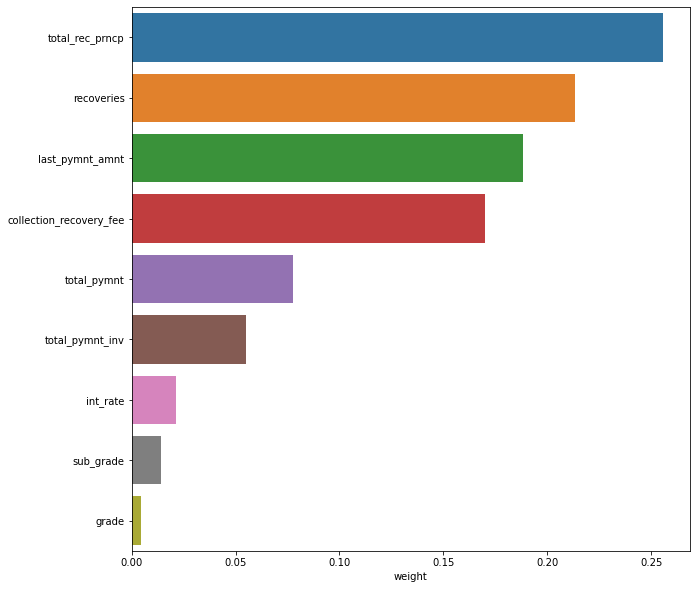

In [24]:
# importance_features = pd.DataFrame(rf.base_estimator_.fit(xtrain, ytrain.values.ravel()).feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
importance_features = pd.DataFrame(temp_rf.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=importance_features.index, x=importance_features['weight'])
plt.show()

### **Tuning Hyper-Parameter**

In [25]:
# n_estimators = [i for i in range(20, 200, 20)]
# max_depth = [int(x) for x in np.linspace(1, 121, num = 30)]
# min_samples_split = [int(x) for x in np.linspace(5, 121, num = 40)]
# min_samples_leaf = [int(x) for x in np.linspace(1, 121, num = 40)]
# max_features = ['auto', 'sqrt'] 

# scoring = 'roc_auc'
# rf_model = RandomForestClassifier(random_state=42)
# hyperparameters = dict(n_estimators = n_estimators,
#                        max_depth = max_depth, 
#                        min_samples_split = min_samples_split, 
#                        min_samples_leaf = min_samples_leaf,
#                        max_features = max_features
#                       )
# rf_model_RS = RandomizedSearchCV(rf_model, hyperparameters, cv=5, scoring=scoring, n_jobs=-1, random_state=111) 
# model = rf_model_RS.fit(xtrain, ytrain.values.ravel())
# y_predict = model.predict(xtest)
# eval_classification(model, xtrain, ytrain, xtest, ytest)
# best_hyperparams = rf_model_RS.best_estimator_.get_params()
# best_hyperparams['random_state'] = 42
# best_hyperparams

In [26]:
# importance_features = pd.DataFrame(rf_model_RS.best_estimator_.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
# plt.figure(figsize=(10,10))
# sns.barplot(y=importance_features.index, x=importance_features['weight'])
# plt.show()

### **XGBoost**

In [27]:
xgb = XGBClassifier(random_state=42)
temp_xgb = xgb.fit(xtrain, ytrain.values.ravel())
eval_classification(xgb, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 0.98
F1-Score (Test Set): 0.99
AUC (test-proba): 1.00
AUC (train-proba): 1.00
tp : 7867
fp  : 37
fn  : 148
tn  : 35539



#### **Feature Importance**

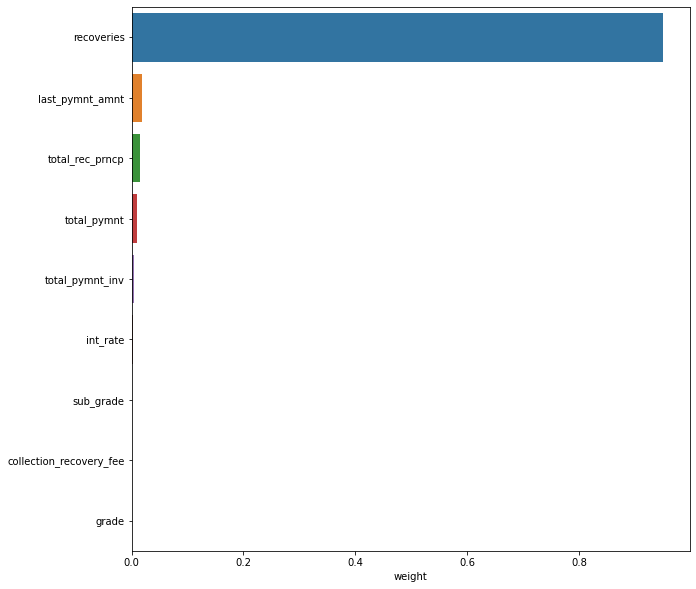

In [28]:
xgb_best = pd.DataFrame(temp_xgb.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=xgb_best.index, x=xgb_best['weight'])
plt.show()

# **Apply Model to Data**

### Before Treatment

In [29]:
before_t = xtest.copy()
before_t['is_charged_off'] = ytest.copy()
# before_t.is_charged_off.mean()
df_clean.is_charged_off.mean()

0.18243550155768956

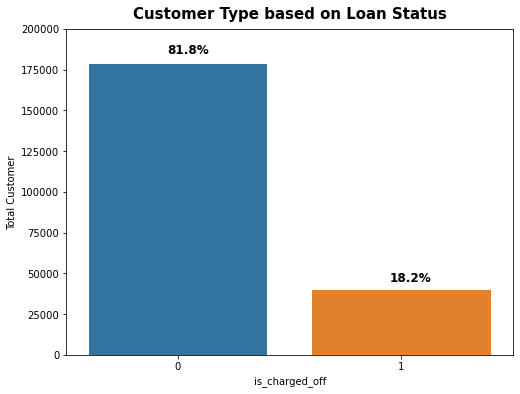

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_clean.groupby(['is_charged_off']).size().reset_index(), x='is_charged_off', y=0)
persen = df_clean.is_charged_off.value_counts(normalize=True).reset_index()
plt.ylim(0,200000)
plt.text(x=-0.05, y=185000, s=str(round(persen.is_charged_off[0],3)*100)+'%', fontweight='semibold', fontsize=12)
plt.text(x=0.95, y=45000, s=str(round(persen.is_charged_off[1],3)*100)+'%', fontweight='semibold', fontsize=12)
plt.title('Customer Type based on Loan Status', fontweight='semibold', fontsize=15, pad=10)
plt.ylabel('Total Customer')
plt.show()

### **After Treatment**

In [31]:
after_t = xtest.copy()
after_t['predict'] = temp_xgb.predict(xtest)
after_t['actual'] = ytest
after_t['real_case'] = ytest
after_t['real_case'] = after_t.apply(lambda x: 0 if(x.predict==1) else x.real_case, axis=1)
after_t[after_t.actual==1]

,total_pymnt,last_pymnt_amnt,sub_grade,total_pymnt_inv,collection_recovery_fee,grade,recoveries,total_rec_prncp,int_rate,predict,actual,real_case
228310,0.082566,-0.856237,1.838443,0.089617,0.001542,2.437546,2.111106,-0.844611,1.524807,1,1,0.0
267945,-1.843299,-0.822663,0.842924,-1.783458,-0.151214,0.931038,-0.222992,-1.251849,0.626422,1,1,0.0
174719,0.257266,-0.857190,1.083049,0.259348,8.480695,0.931038,7.535512,-0.989417,1.178374,1,1,0.0
195183,-1.017245,-0.803336,0.964620,-0.990157,-0.045372,0.931038,1.394259,-1.129911,1.120364,1,1,0.0
45601,-1.856818,-0.823458,-0.654352,-1.804951,-0.151214,-0.575470,-0.222992,-1.232941,-0.581188,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
418681,-1.357374,-0.820390,0.316879,-1.318933,-0.151214,0.177784,-0.222992,-1.184105,0.274371,1,1,0.0
27212,-2.873928,-0.851061,0.964620,-2.797673,-0.151214,0.931038,-0.222992,-1.376161,0.477177,1,1,0.0
159942,-1.389800,-0.805796,0.588517,-1.350128,-0.036422,0.177784,1.531020,-1.254121,0.827292,1,1,0.0
127998,-1.592920,-0.824823,-0.132438,-1.544921,2.621227,-0.575470,2.785588,-1.377794,0.152747,1,1,0.0


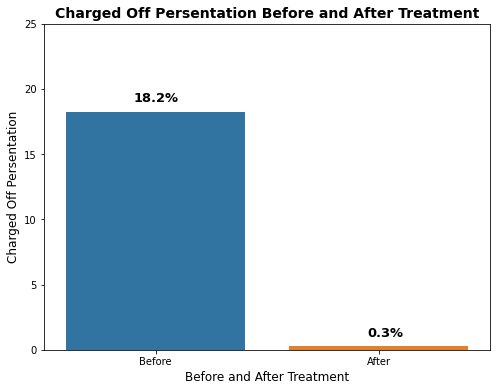

In [37]:
plt.figure(figsize=(8,6))
plt.title('Charged Off Persentation Before and After Treatment', fontsize=14, fontweight='bold')
sns.barplot(x=['Before','After'], y=[round(df_clean.is_charged_off.mean()*100,1), round(after_t.real_case.mean()*100,1)])
plt.ylim(0,25)
plt.text(x=-0.1, y=19, s=str(round(df_clean.is_charged_off.mean()*100,1))+'%', fontsize=13, fontweight='semibold')
plt.text(x=0.95, y=1, s=str(round(after_t.real_case.mean()*100,1))+'%', fontsize=13, fontweight='semibold')
plt.xlabel('Before and After Treatment', fontsize=12)
plt.ylabel('Charged Off Persentation', fontsize=12)
plt.show()

In [33]:
idx_after = after_t[after_t.real_case==1].index
idx_before = after_t[after_t.actual==1].index
df.loc[idx_after, 'loan_amnt'].sum()
df.loc[idx_before, 'loan_amnt'].sum()

118019675

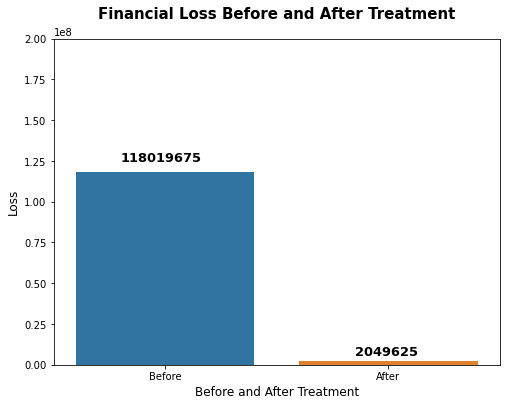

In [34]:
plt.figure(figsize=(8,6))
plt.title('Financial Loss Before and After Treatment', fontsize=15, fontweight='bold', pad=20)
sns.barplot(x=['Before','After'], y=[ df.loc[idx_before, 'loan_amnt'].sum(), df.loc[idx_after, 'loan_amnt'].sum()])
plt.ylim(0,200000000)
plt.text(x=-0.2, y=125000000, s=str(round( df.loc[idx_before, 'loan_amnt'].sum(),1)), fontsize=13, fontweight='semibold')
plt.text(x=0.85, y=6000000, s=str(round( df.loc[idx_after, 'loan_amnt'].sum(),1)), fontsize=13, fontweight='semibold')
plt.xlabel('Before and After Treatment', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()

In [35]:
rev_after = after_t[after_t.real_case==0].index
rev_before = after_t[after_t.actual==0].index
df.loc[rev_after, 'loan_amnt'].sum()
df.loc[rev_before, 'loan_amnt'].sum()

475772000

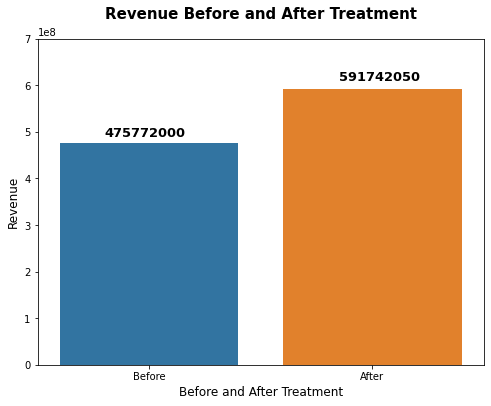

In [36]:
plt.figure(figsize=(8,6))
plt.title('Revenue Before and After Treatment', fontsize=15, fontweight='bold', pad=20)
sns.barplot(x=['Before','After'], y=[ df.loc[rev_before, 'loan_amnt'].sum(), df.loc[rev_after, 'loan_amnt'].sum()])
plt.ylim(0,700000000)
plt.text(x=-0.2, y=490000000, s=str(round( df.loc[rev_before, 'loan_amnt'].sum(),1)), fontsize=13, fontweight='semibold')
plt.text(x=0.85, y=610000000, s=str(round( df.loc[rev_after, 'loan_amnt'].sum(),1)), fontsize=13, fontweight='semibold')
plt.xlabel('Before and After Treatment', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()